# Plotting data from Ulog files

In [4]:
pip install pyulog


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pyulog

In [19]:

from pyulog import ULog
import pandas as pd


ulog = pyulog.ULog('19_26_12.ulg')
# Convert each topic to CSV
for message in ulog.data_list:
    topic_name = message.name
    field_names = [field.field_name for field in message.field_data]
    
    # Extract data
    data = {field: message.data[field] for field in field_names}
    
    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Save as CSV
    csv_filename = f"{topic_name}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"Saved: {csv_filename}")


Saved: actuator_armed.csv
Saved: actuator_motors.csv
Saved: actuator_outputs.csv
Saved: battery_status.csv
Saved: config_overrides.csv
Saved: control_allocator_status.csv
Saved: cpuload.csv
Saved: distance_sensor_mode_change_request.csv
Saved: ekf2_timestamps.csv
Saved: esc_status.csv
Saved: estimator_aid_src_baro_hgt.csv
Saved: estimator_aid_src_fake_hgt.csv
Saved: estimator_aid_src_fake_pos.csv
Saved: estimator_aid_src_gnss_hgt.csv
Saved: estimator_aid_src_gnss_pos.csv
Saved: estimator_aid_src_gnss_vel.csv
Saved: estimator_aid_src_gravity.csv
Saved: estimator_aid_src_mag.csv
Saved: estimator_baro_bias.csv
Saved: estimator_event_flags.csv
Saved: estimator_gps_status.csv
Saved: estimator_innovation_test_ratios.csv
Saved: estimator_innovation_variances.csv
Saved: estimator_innovations.csv
Saved: estimator_sensor_bias.csv
Saved: estimator_states.csv
Saved: estimator_status.csv
Saved: estimator_status_flags.csv
Saved: event.csv
Saved: failsafe_flags.csv
Saved: failure_detector_status.csv


In [23]:
import scipy
print(scipy.__version__)


1.8.0


In [24]:
pip install --upgrade scipy


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 30.3 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


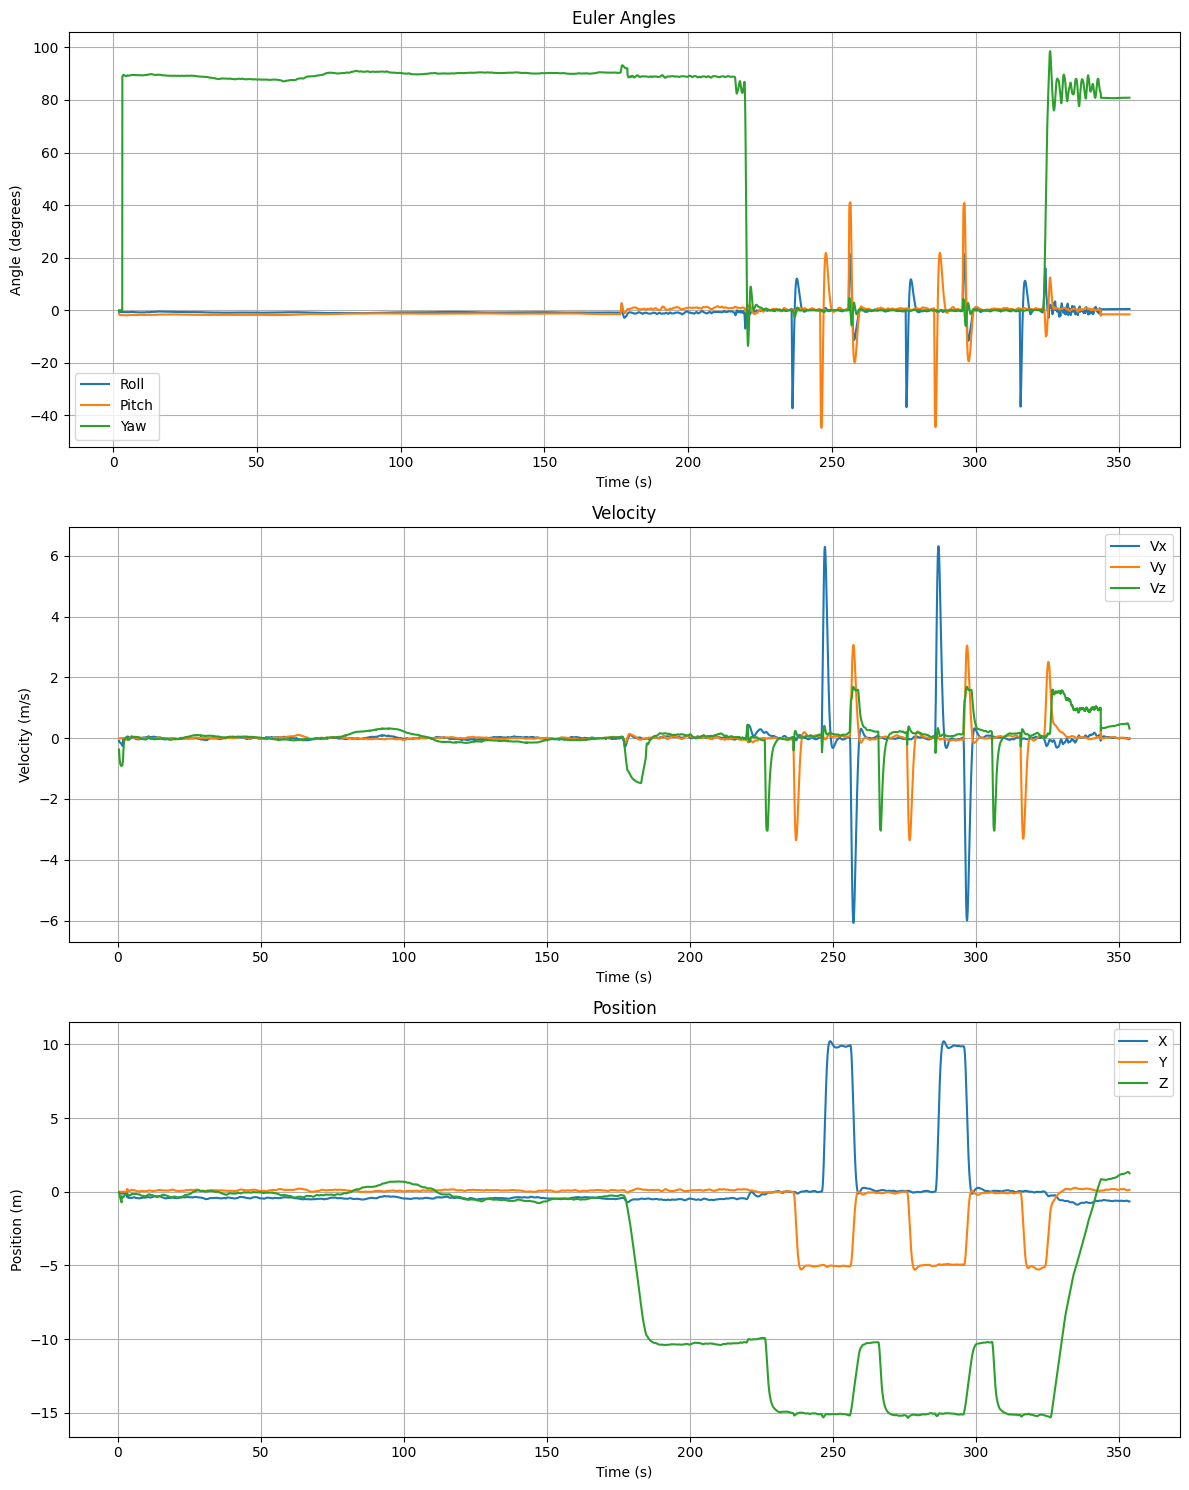

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Load the CSV files
attitude_df = pd.read_csv('vehicle_attitude.csv')
position_df = pd.read_csv('vehicle_local_position.csv')

# Convert quaternions to Euler angles (roll, pitch, yaw)
# Extract quaternion components
q0 = attitude_df['q[0]'].values
q1 = attitude_df['q[1]'].values
q2 = attitude_df['q[2]'].values
q3 = attitude_df['q[3]'].values

# Create rotation objects and convert to Euler angles
rotations = R.from_quat(np.column_stack((q1, q2, q3, q0)))
euler_angles = rotations.as_euler('xyz', degrees=True)

# Add Euler angles to the dataframe
attitude_df['roll_deg'] = euler_angles[:, 0]
attitude_df['pitch_deg'] = euler_angles[:, 1]
attitude_df['yaw_deg'] = euler_angles[:, 2]

# Create plots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot Euler angles
axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['roll_deg'], label='Roll')
axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['pitch_deg'], label='Pitch')
axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['yaw_deg'], label='Yaw')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Angle (degrees)')
axs[0].set_title('Euler Angles')
axs[0].legend()
axs[0].grid(True)

# Plot velocity
axs[1].plot(position_df['timestamp'] / 1e6, position_df['vx'], label='Vx')
axs[1].plot(position_df['timestamp'] / 1e6, position_df['vy'], label='Vy')
axs[1].plot(position_df['timestamp'] / 1e6, position_df['vz'], label='Vz')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_title('Velocity')
axs[1].legend()
axs[1].grid(True)

# Plot position
axs[2].plot(position_df['timestamp'] / 1e6, position_df['x'], label='X')
axs[2].plot(position_df['timestamp'] / 1e6, position_df['y'], label='Y')
axs[2].plot(position_df['timestamp'] / 1e6, position_df['z'], label='Z')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Position (m)')
axs[2].set_title('Position')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


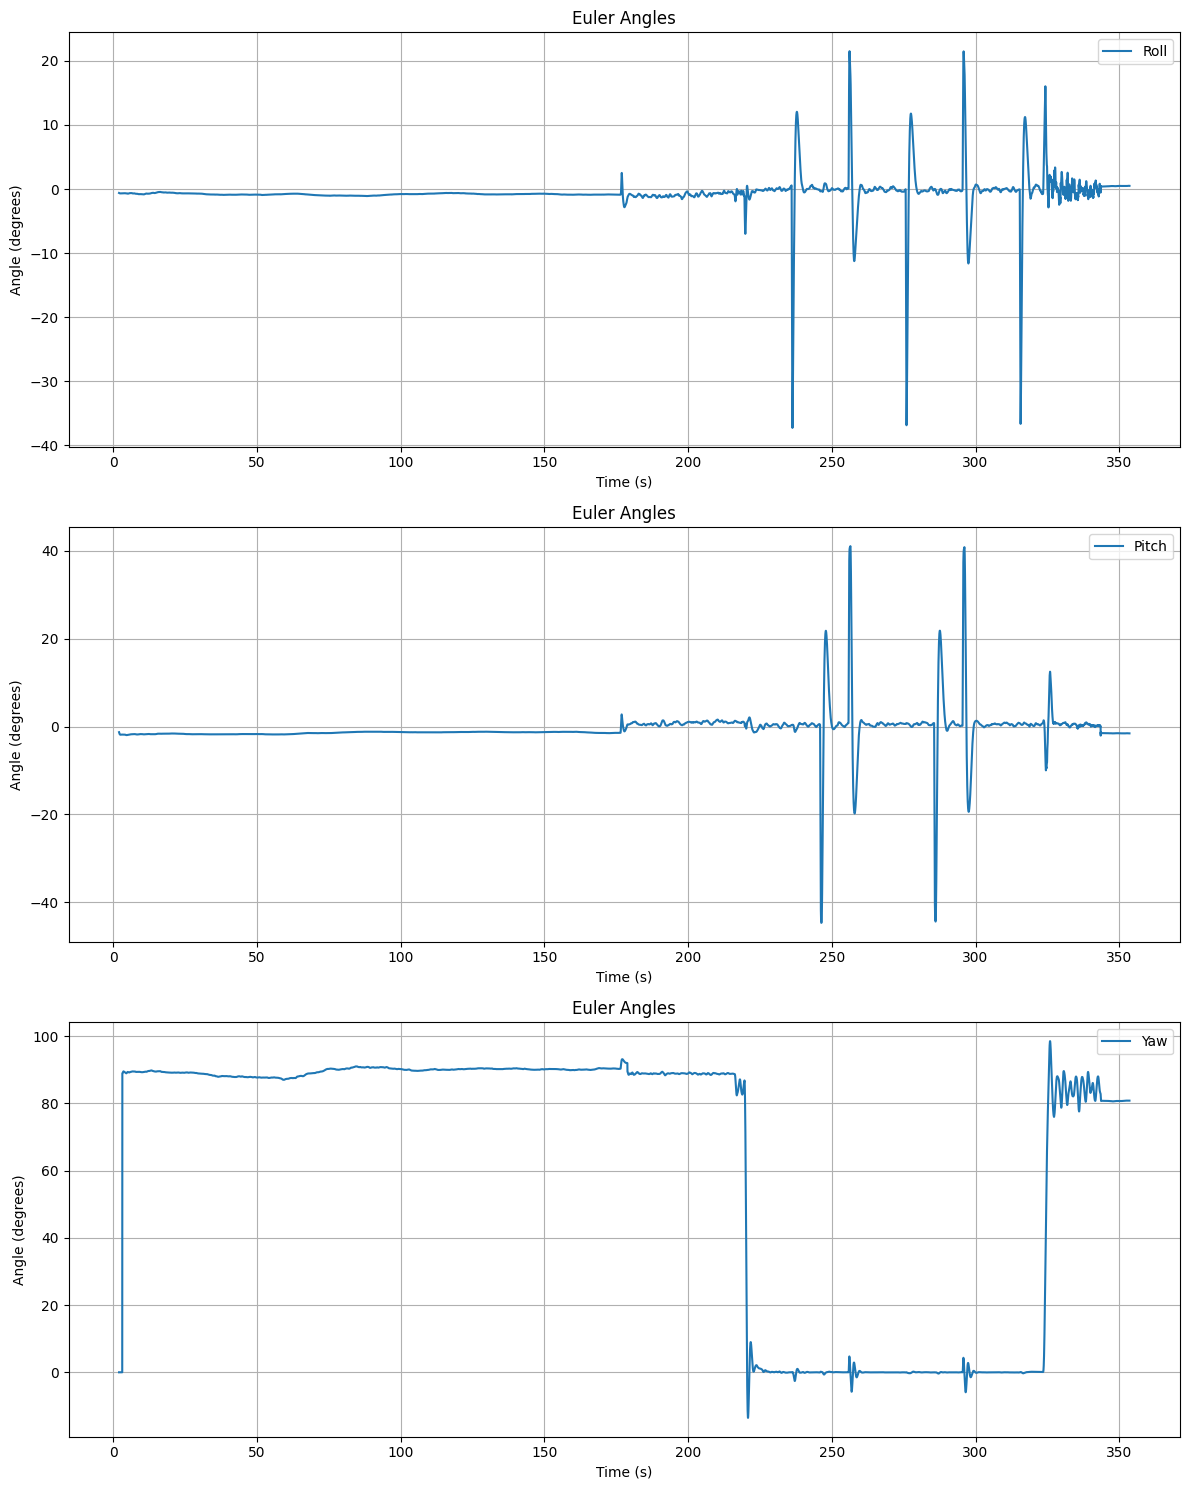

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
# Plot Euler angles
axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['roll_deg'], label='Roll')
# axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['pitch_deg'], label='Pitch')
# axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['yaw_deg'], label='Yaw')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Angle (degrees)')
axs[0].set_title('Euler Angles')
axs[0].legend()
axs[0].grid(True)

# axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['roll_deg'], label='Roll')
axs[1].plot(attitude_df['timestamp'] / 1e6, attitude_df['pitch_deg'], label='Pitch')
# axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['yaw_deg'], label='Yaw')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Angle (degrees)')
axs[1].set_title('Euler Angles')
axs[1].legend()
axs[1].grid(True)

# axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['roll_deg'], label='Roll')
# axs[0].plot(attitude_df['timestamp'] / 1e6, attitude_df['pitch_deg'], label='Pitch')
axs[2].plot(attitude_df['timestamp'] / 1e6, attitude_df['yaw_deg'], label='Yaw')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Angle (degrees)')
axs[2].set_title('Euler Angles')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


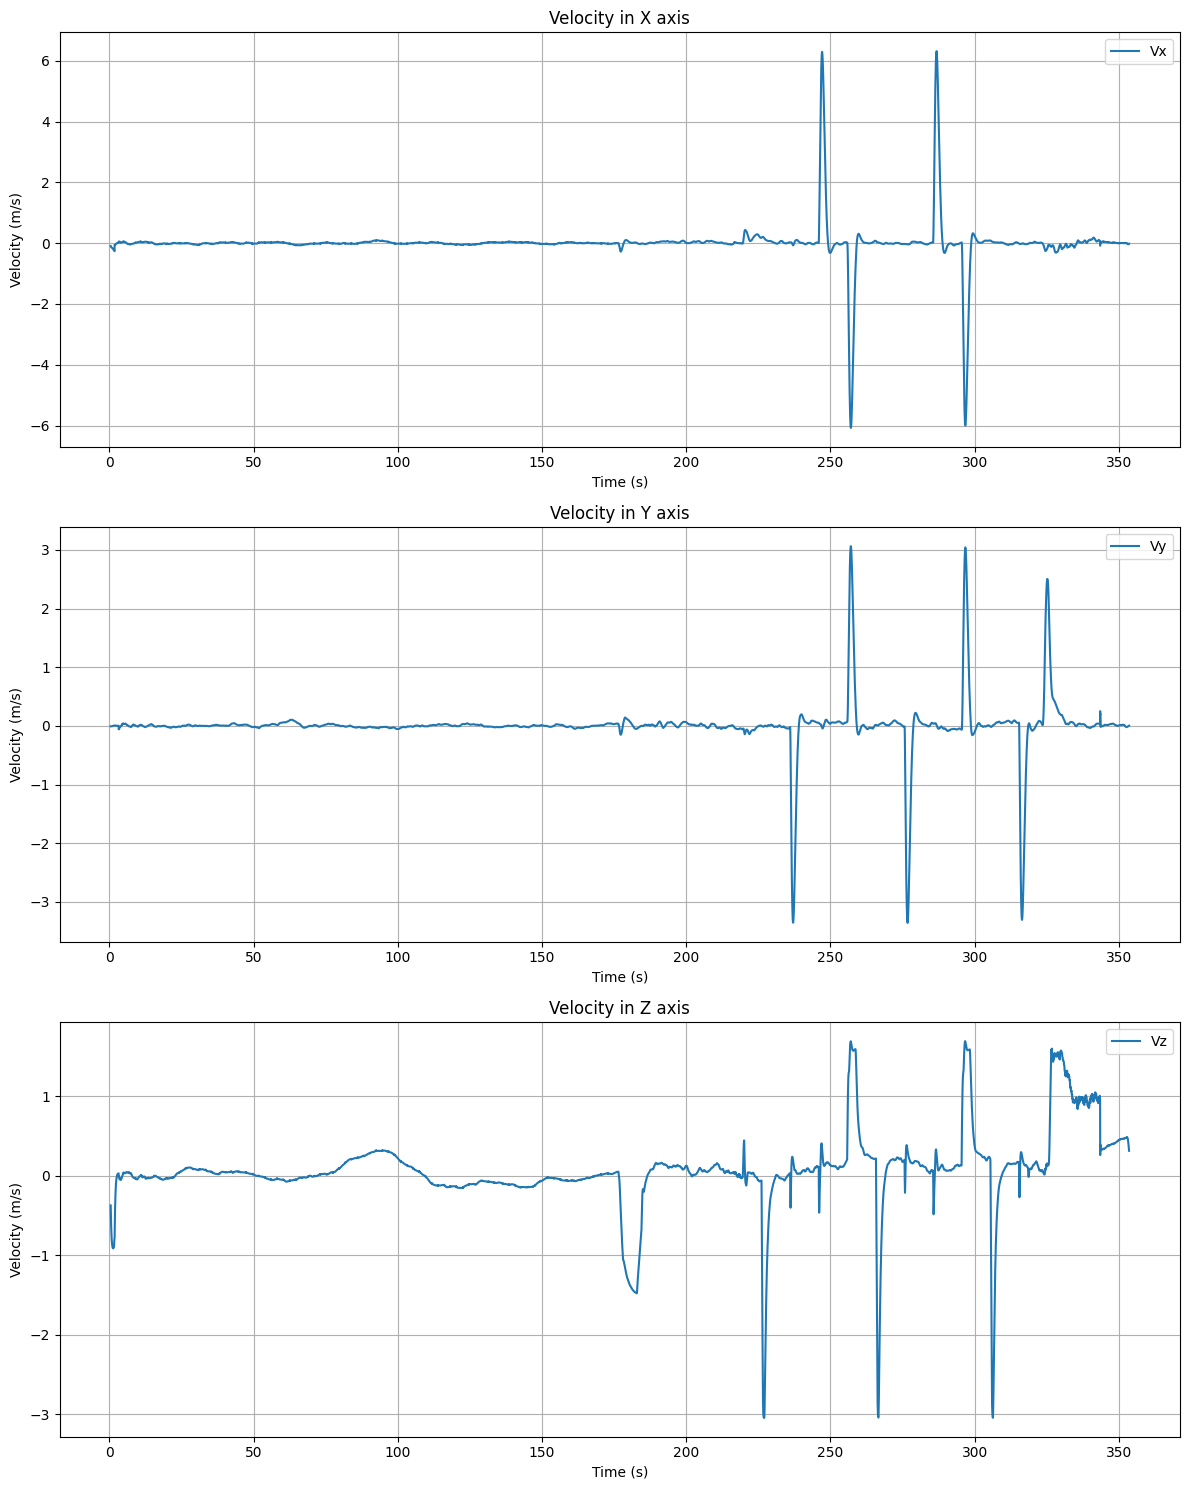

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
# Plot velocity

axs[0].plot(position_df['timestamp'] / 1e6, position_df['vx'], label='Vx')
# axs[0].plot(position_df['timestamp'] / 1e6, position_df['vy'], label='Vy')
# axs[0].plot(position_df['timestamp'] / 1e6, position_df['vz'], label='Vz')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Velocity (m/s)')
axs[0].set_title('Velocity in X axis')
axs[0].legend()
axs[0].grid(True)

# axs[1].plot(position_df['timestamp'] / 1e6, position_df['vx'], label='Vx')
axs[1].plot(position_df['timestamp'] / 1e6, position_df['vy'], label='Vy')
# axs[1].plot(position_df['timestamp'] / 1e6, position_df['vz'], label='Vz')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_title('Velocity in Y axis')
axs[1].legend()
axs[1].grid(True)

# axs[1].plot(position_df['timestamp'] / 1e6, position_df['vx'], label='Vx')
# axs[1].plot(position_df['timestamp'] / 1e6, position_df['vy'], label='Vy')
axs[2].plot(position_df['timestamp'] / 1e6, position_df['vz'], label='Vz')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Velocity (m/s)')
axs[2].set_title('Velocity in Z axis')
axs[2].legend()
axs[2].grid(True)


plt.tight_layout()
plt.show()


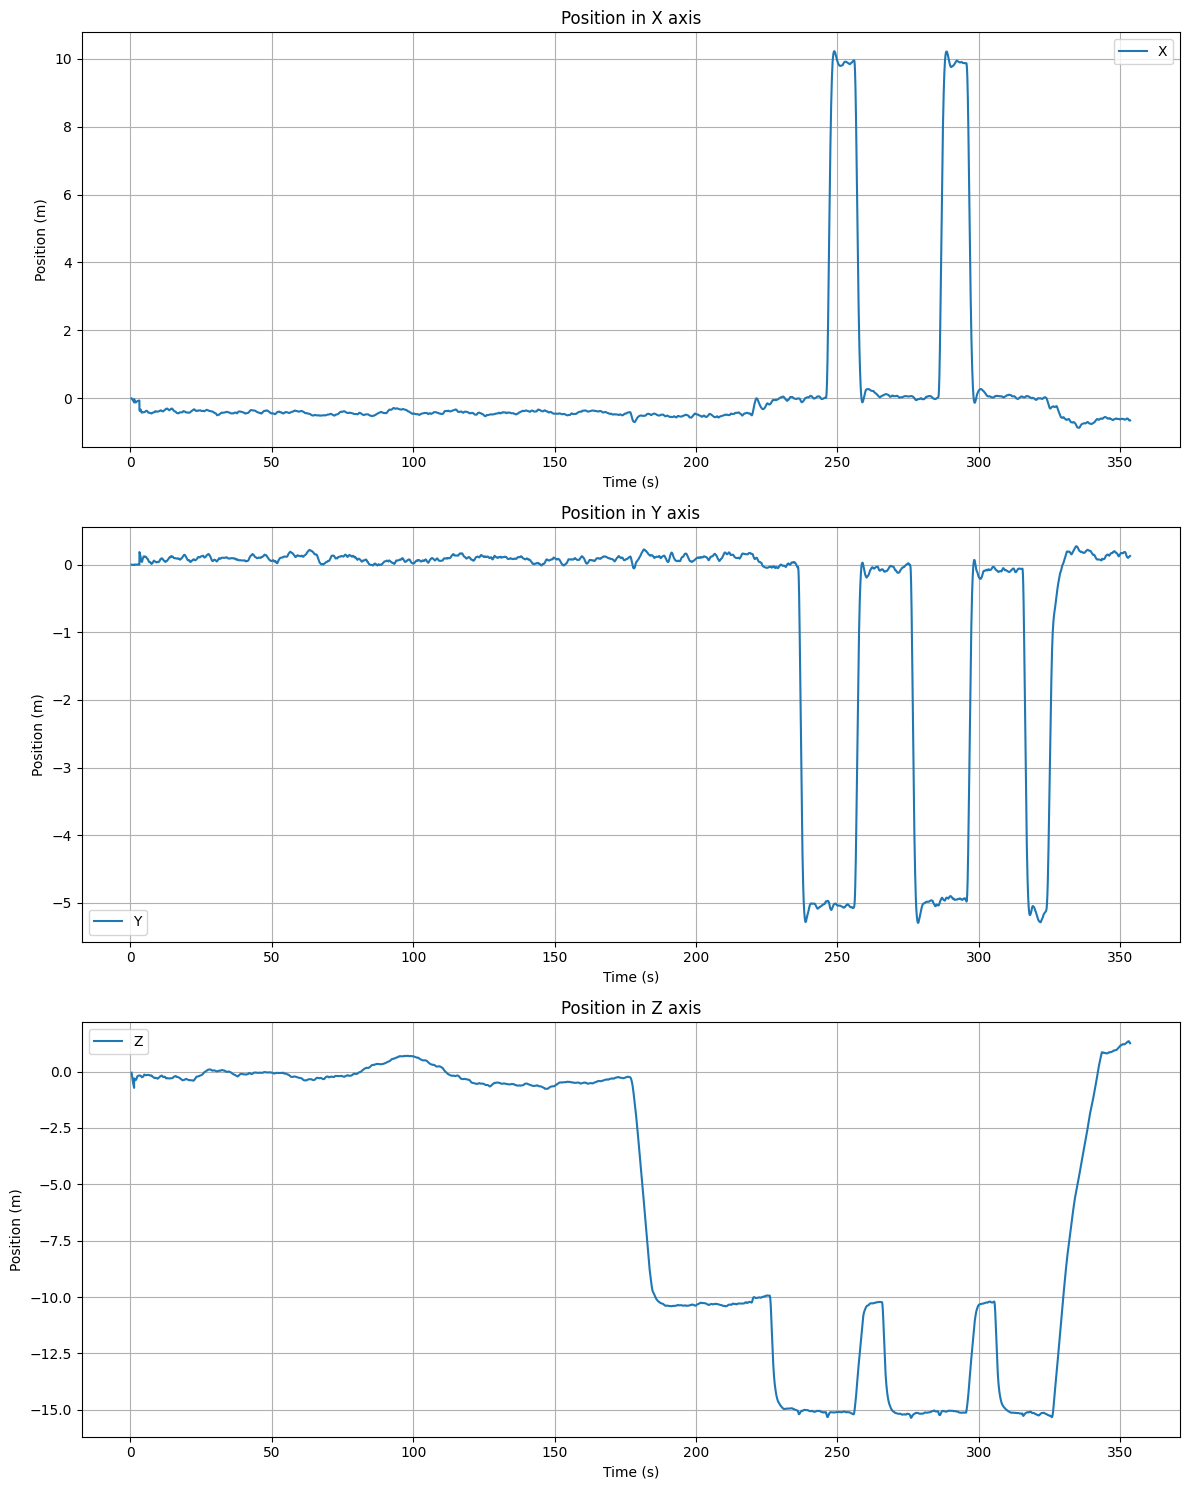

In [10]:

fig, axs = plt.subplots(3, 1, figsize=(12, 15))
# Plot position
axs[0].plot(position_df['timestamp'] / 1e6, position_df['x'], label='X')
# axs[2].plot(position_df['timestamp'] / 1e6, position_df['y'], label='Y')
# axs[2].plot(position_df['timestamp'] / 1e6, position_df['z'], label='Z')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Position (m)')
axs[0].set_title('Position in X axis')
axs[0].legend()
axs[0].grid(True)

# axs[1].plot(position_df['timestamp'] / 1e6, position_df['x'], label='X')
axs[1].plot(position_df['timestamp'] / 1e6, position_df['y'], label='Y')
# axs[1].plot(position_df['timestamp'] / 1e6, position_df['z'], label='Z')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Position (m)')
axs[1].set_title('Position in Y axis')
axs[1].legend()
axs[1].grid(True)


# axs[2].plot(position_df['timestamp'] / 1e6, position_df['x'], label='X')
# axs[2].plot(position_df['timestamp'] / 1e6, position_df['y'], label='Y')
axs[2].plot(position_df['timestamp'] / 1e6, position_df['z'], label='Z')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Position (m)')
axs[2].set_title('Position in Z axis')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()